In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('startup_funding.csv')
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [3]:
df['Startup Name'].value_counts().index

Index(['Swiggy', 'Ola Cabs', 'Paytm', 'Medinfi', 'NoBroker', 'Meesho',
       'UrbanClap', 'Nykaa', 'Capital Float', 'Uniphore',
       ...
       'Verayu', 'RateGain', 'ShopClues', 'Refiral', 'Ping Digital',
       'Hostel Dunia', 'Play your sport', 'Dhruva Space', 'Ecozen', 'Pando'],
      dtype='object', name='Startup Name', length=2459)

In [4]:
df['Investors Name'] = df['Investors Name'].fillna('Undisclosed')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3044 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [6]:
df['Investors Name'].unique().tolist()

['Tiger Global Management',
 'Susquehanna Growth Equity',
 'Sequoia Capital India',
 'Vinod Khatumal',
 'Sprout Venture Partners',
 'Chiratae Ventures',
 'Ant Financial',
 'Sathguru Catalyzer Advisors',
 'Ping An Global Voyager Fund',
 'Mumbai Angels, Ravikanth Reddy',
 'SAIF Partners, Spring Canter Investment Ltd.',
 'Paytm, NPTK, Sabre Partners and Neoplux',
 'Vertex Growth Fund',
 'Undisclosed',
 'Ruizheng Investment',
 'Manipal Education and Medical Group (MEMG)',
 'SoftBank Vision Fund',
 'Sequoia, CapitalG, Accel',
 'Sauce.vc, Rainforest Ventures',
 'Prime Venture Partners, LetsVenture, PS1 Venture and GlobalLogic co-founder Rajul Garg',
 'RB Investments',
 'DG Daiwa Ventures, DG Incubation',
 'Trifecta Capital Advisors',
 'FinTech',
 'Dream Incubator',
 'Altimeter Capital, Sutter Hill Ventures',
 'Startup Buddy',
 'Amour Infrastructure',
 'Ackermans & van Haaren, HealthQuad, Rebright Partners, Toppan Printing',
 'Matrix Partners, Stellaris Venture Partners, Kalaari Capital',
 'I

In [7]:
df.head(2)

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN


In [8]:
df.drop(columns=['Remarks'], inplace=True)

In [9]:
df.set_index('Sr No', inplace=True)

In [10]:
df.head(1)

,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"


In [11]:
df.rename(columns={
    'Date dd/mm/yyyy': 'date',
    'Startup Name': 'startup',
    'Industry Vertical': 'vertical',
    'City  Location': 'city',
    'Investors Name': 'investors',
    'InvestmentnType': 'round',
    'Amount in USD': 'amount'
}, inplace=True)
df.head(1)

,date,startup,vertical,SubVertical,city,investors,round,amount
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"


In [12]:
df['amount'] = df['amount'].fillna('0')

In [13]:
df['amount'] = df['amount'].str.replace(',','')
df['amount'] = df['amount'].str.replace('undisclosed','0')
df['amount'] = df['amount'].str.replace('Undisclosed','0')
df['amount'] = df['amount'].str.replace('unknown','0')
df = df[df['amount'].str.isdigit()]

In [14]:
df['amount'] = df['amount'].astype('float')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3029 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3029 non-null   object 
 1   startup      3029 non-null   object 
 2   vertical     2858 non-null   object 
 3   SubVertical  2104 non-null   object 
 4   city         2849 non-null   object 
 5   investors    3029 non-null   object 
 6   round        3027 non-null   object 
 7   amount       3029 non-null   float64
dtypes: float64(1), object(7)
memory usage: 213.0+ KB


In [16]:
df.head()

,date,startup,vertical,SubVertical,city,investors,round,amount
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0


In [17]:
def to_inr(dollar):
    inr = dollar * 82.5
    return inr/10000000

In [18]:
df['amount'] = df['amount'].apply(to_inr)

In [19]:
df.head()

,date,startup,vertical,SubVertical,city,investors,round,amount
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000


In [20]:
df['date'] = df['date'].str.replace('05/072018','05/07/2018')

In [21]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')

In [22]:
df.head()

,date,startup,vertical,SubVertical,city,investors,round,amount
Sr No,,,,,,,,
1,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250
3,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595
4,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000
5,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3029 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         3023 non-null   datetime64[ns]
 1   startup      3029 non-null   object        
 2   vertical     2858 non-null   object        
 3   SubVertical  2104 non-null   object        
 4   city         2849 non-null   object        
 5   investors    3029 non-null   object        
 6   round        3027 non-null   object        
 7   amount       3029 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 213.0+ KB


In [24]:
df = df.dropna(subset=['date','startup','vertical','city','investors','round','amount'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2843 entries, 1 to 2873
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         2843 non-null   datetime64[ns]
 1   startup      2843 non-null   object        
 2   vertical     2843 non-null   object        
 3   SubVertical  2096 non-null   object        
 4   city         2843 non-null   object        
 5   investors    2843 non-null   object        
 6   round        2843 non-null   object        
 7   amount       2843 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 199.9+ KB


In [25]:
df.to_csv('startup_cleaned.csv',index=False)

In [26]:
df['date'] = pd.to_datetime(df['date'],errors='coerce')
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [27]:
df.head()

,date,startup,vertical,SubVertical,city,investors,round,amount,month,year
Sr No,,,,,,,,,,
1,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000,1,2020
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250,1,2020
3,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595,1,2020
4,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000,1,2020
5,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000,1,2020


In [28]:
sorted(set(df['investors'].str.split(',').sum()))

['',
 ' & Others',
 ' 100 Co-founders Lab and others.',
 ' 122 West Ventures',
 ' 1Crowd',
 ' 3ONE4 Capital Advisors',
 ' 3one4 Capital',
 ' 3one4 Capital Advisors LLP',
 ' 500 Start-Ups',
 ' 500 Startups',
 ' 500 Startups & Other HNIs',
 ' 50K Ventures & others',
 ' 91SpringBoard',
 ' 91springboard',
 ' ABB Technology Ventures',
 ' ABCOM Investments',
 ' AECAL',
 ' AET Fund',
 ' AL Nour International Holdings and Mark V Investments',
 ' ASP Consulting',
 ' AVN Business Solutions',
 ' Aarin Capital',
 ' Aarin Capital & Others',
 ' Aaruha Technology Fund',
 ' Abaran Deep',
 ' Abhai S. Rao',
 ' Abhay Singhal',
 ' Abhijit Bhandari',
 ' Abhinav Patodia',
 ' Abhinav Sinha',
 ' Abhishek Acharya',
 ' Abhishek Goyal',
 ' Abhishek Gupta',
 ' Abhishek Jain',
 ' Abhishekh Goyal',
 ' Abstract Ventures',
 ' Abu Farhan Azmi',
 ' Accel',
 ' Accel India',
 ' Accel Partner',
 ' Accel Partners',
 ' Accel Partners & Others',
 ' Accel Partners & Raghunandan Gangappa',
 ' Accel Partners & existing investor

In [29]:
df[df['investors'].str.contains(' IDG Ventures')].groupby('startup')['amount'].sum().sort_values(ascending=False)

startup
Lenskart                 495.000000
CureFit                  206.250000
Bizongo                  181.500000
Curefit                  123.750000
Xpressbees               103.125000
FirstCry.com              82.500000
POPxo                     70.950000
\\xc2\\xa0CloudCherry     49.500000
Sigtuple                  47.850000
Aasaanjobs                41.250000
RentMojo                  41.250000
PlaySimple                33.000000
Tripoto                   29.628844
Active.ai                 24.750000
Heckyl                    22.275000
Cloudcherry Analytics      8.250000
Little Black Book          8.250000
Name: amount, dtype: float64

In [30]:
df.head(2)

,date,startup,vertical,SubVertical,city,investors,round,amount,month,year
Sr No,,,,,,,,,,
1,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.00000,1,2020
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.39925,1,2020


In [31]:
df[df['investors'].str.contains(' IDG Ventures')].groupby('round')['amount'].sum().sort_values(ascending=False)

round
Private Equity    1531.200000
Series B            29.628844
Seed Funding         8.250000
Name: amount, dtype: float64

In [32]:
round(df['amount'].sum())

301620

In [33]:
round(df.groupby('startup')['amount'].max()).sort_values(ascending=False).head(1).values[0]

np.float64(32175.0)

In [34]:
df['amount'].max()

np.float64(32175.0)

In [35]:
df[df['amount'] == 32175.0]

,date,startup,vertical,SubVertical,city,investors,round,amount,month,year
Sr No,,,,,,,,,,
61,2019-08-27,Rapido Bike Taxi,Transportation,Bike Taxi,Bengaluru,Westbridge Capital,Series B,32175.0,8,2019


In [36]:
round(df.groupby('startup')['amount'].sum().mean())

130

In [37]:
df['amount'].mean()

np.float64(106.0921720926838)

In [38]:
df['startup'].nunique()

2316

In [39]:
temp_df = df.groupby(['year', 'month'])['amount'].sum().reset_index()

In [40]:
temp_df['x_axis'] = temp_df['month'].astype('str') + '-' + temp_df['year'].astype('str')

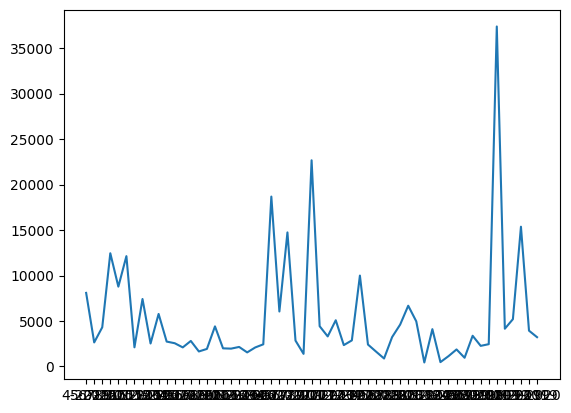

In [41]:
import matplotlib.pyplot as plt
fig , ax = plt.subplots()
ax.plot(temp_df['x_axis'], temp_df['amount'])

In [42]:
# industry = df.groupby(['startup', 'vertical'])['amount'].sum().reset_index()
# industry

In [59]:
industry = df[df['startup'] == 'Urban Ladder'].groupby(['vertical', 'city'])['amount'].sum().reset_index().rename(columns={'vertical': 'Industry'})
industry

,Industry,city,amount
0,E-Commerce,Bengaluru,99.0
1,ECommerce,Bangalore,125.4
2,Online Furnishing\\neCommerce,Bangalore,412.5
3,Online Furniture ecommerce,Bangalore,0.0


In [60]:
# pd.set_option('display.max_rows', None)
df[df['startup'] == 'Urban Ladder']

,date,startup,vertical,SubVertical,city,investors,round,amount,month,year
Sr No,,,,,,,,,,
318,2018-03-01,Urban Ladder,E-Commerce,Online Furniture Store,Bengaluru,"Sequoia Capital, SAIF Partners and Kalaari cap...",Private Equity,99.0,3,2018
1028,2017-02-17,Urban Ladder,ECommerce,Online Furniture Store,Bangalore,"Kalaari Capital, SAIF Partners, Steadview Capi...",Private Equity,125.4,2,2017
2825,2015-04-09,Urban Ladder,Online Furnishing\\neCommerce,NaN,Bangalore,"Sequoia Capital, TR Capital, Steadview Capital...",Private Equity,412.5,4,2015
2864,2015-04-28,Urban Ladder,Online Furniture ecommerce,NaN,Bangalore,"Anand Rajaraman, Venky Harinarayan",Private Equity,0.0,4,2015
